<a href="https://colab.research.google.com/github/LucasCta/Doodle_Identification/blob/main/Doodles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install quickdraw
!rm -rf dataset/

  Using cached quickdraw-1.0.0-py3-none-any.whl (11 kB)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from pathlib import Path
from quickdraw import QuickDrawDataGroup, QuickDrawData

import requests

from tensorflow import keras
from keras import layers

import os
import datetime
from keras.callbacks import TensorBoard

In [4]:
image_size = (28, 28)

def generate_class_images(name, max_drawings, recognized):
    directory = Path("dataset/" + name)

    if not directory.exists():
        directory.mkdir(parents=True)

    images = QuickDrawDataGroup(name, max_drawings=max_drawings, recognized=recognized)
    for img in images.drawings:
        filename = directory.as_posix() + "/" + str(img.key_id) + ".png"
        img.get_image(stroke_width=3).resize(image_size).save(filename)


In [5]:
print(QuickDrawData().drawing_names)

['aircraft carrier', 'airplane', 'alarm clock', 'ambulance', 'angel', 'animal migration', 'ant', 'anvil', 'apple', 'arm', 'asparagus', 'axe', 'backpack', 'banana', 'bandage', 'barn', 'baseball bat', 'baseball', 'basket', 'basketball', 'bat', 'bathtub', 'beach', 'bear', 'beard', 'bed', 'bee', 'belt', 'bench', 'bicycle', 'binoculars', 'bird', 'birthday cake', 'blackberry', 'blueberry', 'book', 'boomerang', 'bottlecap', 'bowtie', 'bracelet', 'brain', 'bread', 'bridge', 'broccoli', 'broom', 'bucket', 'bulldozer', 'bus', 'bush', 'butterfly', 'cactus', 'cake', 'calculator', 'calendar', 'camel', 'camera', 'camouflage', 'campfire', 'candle', 'cannon', 'canoe', 'car', 'carrot', 'castle', 'cat', 'ceiling fan', 'cell phone', 'cello', 'chair', 'chandelier', 'church', 'circle', 'clarinet', 'clock', 'cloud', 'coffee cup', 'compass', 'computer', 'cookie', 'cooler', 'couch', 'cow', 'crab', 'crayon', 'crocodile', 'crown', 'cruise ship', 'cup', 'diamond', 'dishwasher', 'diving board', 'dog', 'dolphin', 

In [14]:
url = 'https://gist.githubusercontent.com/atduskgreg/3cf8ef48cb0d29cf151bedad81553a54/raw/82f142562cf50b0f6fb8010f890b2f934093553e/animals.txt'
page = requests.get(url)
animals = page.text.split("\n")
animals = list(map(lambda x: x.lower(), animals))
print(animals)

['canidae', 'felidae', 'cat', 'cattle', 'dog', 'donkey', 'goat', 'guinea pig', 'horse', 'pig', 'rabbit', 'fancy rat varieties', 'laboratory rat strains', 'sheep breeds', 'water buffalo breeds', 'chicken breeds', 'duck breeds', 'goose breeds', 'pigeon breeds', 'turkey breeds', 'aardvark', 'aardwolf', 'african buffalo', 'african elephant', 'african leopard', 'albatross', 'alligator', 'alpaca', 'american buffalo (bison)', 'american robin', 'amphibian', 'list', 'anaconda', 'angelfish', 'anglerfish', 'ant', 'anteater', 'antelope', 'antlion', 'ape', 'aphid', 'arabian leopard', 'arctic fox', 'arctic wolf', 'armadillo', 'arrow crab', 'asp', 'ass (donkey)', 'baboon', 'badger', 'bald eagle', 'bandicoot', 'barnacle', 'barracuda', 'basilisk', 'bass', 'bat', 'beaked whale', 'bear', 'list', 'beaver', 'bedbug', 'bee', 'beetle', 'bird', 'list', 'bison', 'blackbird', 'black panther', 'black widow spider', 'blue bird', 'blue jay', 'blue whale', 'boa', 'boar', 'bobcat', 'bobolink', 'bonobo', 'booby', 'bo

In [15]:
for i, label in enumerate(QuickDrawData().drawing_names):
    if label in animals and i < 30:
      generate_class_images(label, max_drawings=1000, recognized=True)

downloading ant from https://storage.googleapis.com/quickdraw_dataset/full/binary/ant.bin
download complete
loading ant drawings
load complete
downloading bat from https://storage.googleapis.com/quickdraw_dataset/full/binary/bat.bin
download complete
loading bat drawings
load complete
downloading bear from https://storage.googleapis.com/quickdraw_dataset/full/binary/bear.bin
download complete
loading bear drawings
load complete
downloading bee from https://storage.googleapis.com/quickdraw_dataset/full/binary/bee.bin
download complete
loading bee drawings
load complete


In [88]:
!ls dataset/
!ls dataset | wc -l

'aircraft carrier'   bathtub	      bridge	      lighter
 airplane	     beach	      broccoli	      marker
'alarm clock'	     bear	      broom	      mountain
 ambulance	     beard	      bucket	      octagon
 angel		     bed	      bulldozer      'paper clip'
'animal migration'   bee	      bus	     'pickup truck'
 ant		     belt	      bush	      popsicle
 anvil		     bench	      butterfly       rake
 apple		     bicycle	      cactus	      saxophone
 arm		     binoculars       cake	      shorts
 asparagus	     bird	      canoe	      snorkel
 axe		    'birthday cake'   church	      squiggle
 backpack	     blackberry       couch	      strawberry
 banana		     blueberry	     'diving board'   syringe
 bandage	     book	      dumbbell	     'The Great Wall of China'
 barn		     boomerang	      feather	      tractor
 baseball	     bottlecap	     'floor lamp'     van
'baseball bat'	     bowtie	      goatee	     'wine glass'
 basket		     bracelet	      headphones
 basketball	     brain	     'hot do

In [64]:
batch_size = 32
dataset_dir = Path("dataset/")
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

Found 298713 files belonging to 81 classes.
Using 238971 files for training.
Found 298713 files belonging to 81 classes.
Using 59742 files for validation.


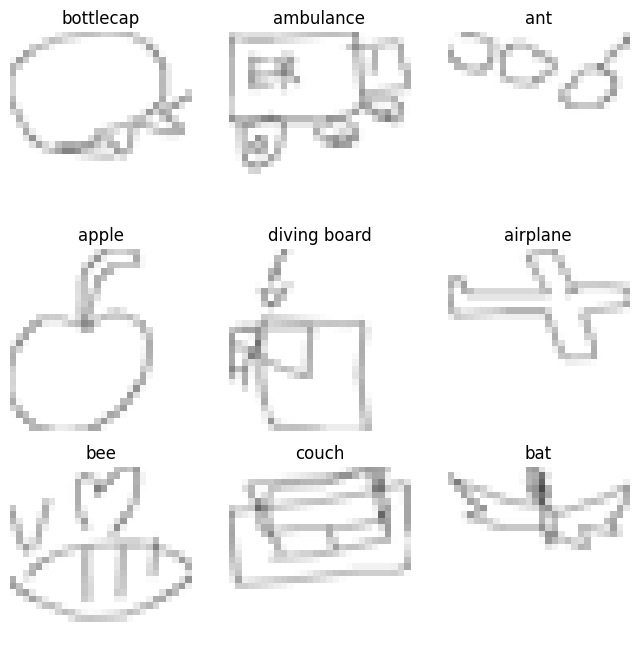

In [65]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        data = images[i].numpy().astype("uint8")
        plt.imshow(data, cmap='gray', vmin=0, vmax=255)
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [100]:
n_classes = 81
input_shape = (28, 28, 1)

model = keras.Sequential([
    layers.Rescaling(1. / 255, input_shape=input_shape),
    layers.BatchNormalization(),

    layers.Conv2D(6, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.Conv2D(8, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.Conv2D(10, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(700, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(500, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(400, activation="relu"),
    layers.Dropout(0.2),

    layers.Dense(n_classes, activation="softmax")
])

In [101]:
epochs = 14

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt)

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1,
    callbacks=[tensorboard_callback]
)

model.save('./models/model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

Epoch 1/14
5426/7468 [====================>.........] - ETA: 3:07 - loss: 1.8551